In [75]:
# import data frame library
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Visualization LIbrary
import matplotlib.pyplot as plt
import seaborn as sns

# # Modeling Library
# import scipy.stats as stats
# import statsmodels.stats.proportion as sp
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import validation_curve
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense

In [2]:
fifa = pd.read_csv('FIFA22_official_data.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [3]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [4]:
fifa22 = fifa[['Name','Age','Nationality','Overall','Club','Value','Wage','Preferred Foot','Best Position', 'International Reputation','Contract Valid Until']].copy()

Membuat data fifa22 yang didapatkan dari load kolom data fifa dengan diambil sebagian saja

In [5]:
fifa22.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
0,Bruno Fernandes,26,Portugal,88,Manchester United,€107.5M,€250K,Right,CAM,3.0,2025
1,L. Goretzka,26,Germany,87,FC Bayern München,€93M,€140K,Right,CM,4.0,2026
2,L. Suárez,34,Uruguay,88,Atlético de Madrid,€44.5M,€135K,Right,ST,5.0,2022
3,K. De Bruyne,30,Belgium,91,Manchester City,€125.5M,€350K,Right,CM,4.0,2025
4,M. Acuña,29,Argentina,84,Sevilla FC,€37M,€45K,Left,LB,2.0,2024


Melihat 5 data teratas dari data fifa22 

In [6]:
fifa22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Nationality               16710 non-null  object 
 3   Overall                   16710 non-null  int64  
 4   Club                      16446 non-null  object 
 5   Value                     16710 non-null  object 
 6   Wage                      16710 non-null  object 
 7   Preferred Foot            16710 non-null  object 
 8   Best Position             16710 non-null  object 
 9   International Reputation  16710 non-null  float64
 10  Contract Valid Until      16359 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB


Melihat informasi jumlah data dan tipe data dari data fifa22

In [7]:
nums = ['Age','Overall', 'Value', 'Wage','International Reputation']
cats = ['Name','Nationality','Club','Preferred Foot','Best Position', 'Contract Valid Until']

In [8]:
fifa22[nums].describe()

,Age,Overall,International Reputation
count,16710.000000,16710.000000,16710.000000
mean,25.727409,67.646320,1.169958
std,5.048910,6.457695,0.485305
min,16.000000,28.000000,1.000000
25%,22.000000,63.000000,1.000000
50%,25.000000,68.000000,1.000000
75%,29.000000,72.000000,1.000000
max,54.000000,93.000000,5.000000


In [9]:
fifa22[cats].describe()

,Name,Nationality,Club,Preferred Foot,Best Position,Contract Valid Until
count,16710,16710,16446,16710,16710,16359
unique,16089,168,869,2,15,56
top,J. Rodríguez,England,AC Milan,Right,CB,2022
freq,10,1845,47,12613,3214,4781


In [10]:
fifa22['Club'].sort_values

<bound method Series.sort_values of 0            Manchester United
1            FC Bayern München
2           Atlético de Madrid
3              Manchester City
4                   Sevilla FC
                 ...          
16705          Cheltenham Town
16706    FC Academica Clinceni
16707      Shanghai Shenhua FC
16708       ATK Mohun Bagan FC
16709                   Arezzo
Name: Club, Length: 16710, dtype: object>

In [11]:
EPL = [['Arsenal', 'Aston Villa','Brighton & Hove Albion','Burnley','Brentford','Chelsea',
        'Crystal Palace','Everton','Leicester City','Liverpool', 'Manchester City','Manchester United','Newcastle United', 'Norwich City', 'Leeds United',
       'Southampton', 'Tottenham Hotspur', 'Watford', 'West Ham United', 'Wolverhampton Wanderers']]

Membuat data baru yang berisikan club-club yang berkompetisi pada English Premier League pada tahun 2022

In [12]:
team_overall = fifa.groupby(by='Club', axis=0,)['ID'].count()
team_overall

Club
1. FC Heidenheim 1846        26
1. FC Kaiserslautern         24
1. FC Köln                   35
1. FC Magdeburg              18
1. FC Nürnberg               27
                             ..
Östersunds FK                16
İstanbul Başakşehir FK       31
İttifak Holding Konyaspor    20
ŁKS Łódź                      1
Śląsk Wrocław                21
Name: ID, Length: 869, dtype: int64

In [13]:
EPL = fifa22[fifa22['Club'].isin(['Arsenal', 'Aston Villa','Brighton & Hove Albion','Burnley','Brentford','Chelsea','Crystal Palace',
       'Everton','Leicester City','Liverpool', 'Manchester City','Manchester United','Newcastle United', 'Norwich City', 'Leeds United',
       'Southampton', 'Tottenham Hotspur', 'Watford', 'West Ham United', 'Wolverhampton Wanderers'])]
EPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 16662
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      747 non-null    object 
 1   Age                       747 non-null    int64  
 2   Nationality               747 non-null    object 
 3   Overall                   747 non-null    int64  
 4   Club                      747 non-null    object 
 5   Value                     747 non-null    object 
 6   Wage                      747 non-null    object 
 7   Preferred Foot            747 non-null    object 
 8   Best Position             747 non-null    object 
 9   International Reputation  747 non-null    float64
 10  Contract Valid Until      747 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 70.0+ KB


In [14]:
fifa22.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
0,Bruno Fernandes,26,Portugal,88,Manchester United,€107.5M,€250K,Right,CAM,3.0,2025
1,L. Goretzka,26,Germany,87,FC Bayern München,€93M,€140K,Right,CM,4.0,2026
2,L. Suárez,34,Uruguay,88,Atlético de Madrid,€44.5M,€135K,Right,ST,5.0,2022
3,K. De Bruyne,30,Belgium,91,Manchester City,€125.5M,€350K,Right,CM,4.0,2025
4,M. Acuña,29,Argentina,84,Sevilla FC,€37M,€45K,Left,LB,2.0,2024


In [15]:
Arsenal = fifa22[fifa22['Club'].isin(['Arsenal'])]
Arsenal.sort_values(['Age'], ascending=True)

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
14356,Z. Monlouis,17,England,61,Arsenal,€625K,€500,Right,CB,1.0,2022
12746,J. Ideho,17,Netherlands,62,Arsenal,€900K,€2K,Right,RM,1.0,2023
9199,C. Patino,17,England,62,Arsenal,€1.2M,€2K,Left,CDM,1.0,2022
16571,21 K. Hein,18,Estonia,56,Arsenal,€325K,€900,Right,GK,1.0,2026
12407,21 B. Cottrell,18,England,56,Arsenal,€325K,€4K,Right,CAM,1.0,2022
10143,C. Cîrjan,18,Romania,62,Arsenal,€1M,€4K,Right,CAM,1.0,2022
13174,Joel López,19,Spain,60,Arsenal,€600K,€5K,Left,LB,1.0,2022
547,B. Saka,19,England,80,Arsenal,€45.5M,€50K,Left,LM,2.0,2025
16408,A. Okonkwo,19,England,61,Arsenal,€750K,€3K,Right,GK,1.0,2024
9320,T. Akinola,20,England,61,Arsenal,€825K,€7K,Right,CDM,1.0,2022


In [16]:
Arsenal.drop(index=[12300, 474, 559, 15661, 1377], inplace=True)

Membuat data yang berisikan pemain-pemain dari klub Arsenal yang berada di English Premier League

In [17]:
foot_Arsenal = Arsenal['Preferred Foot'].value_counts()
foot_Arsenal

Right    25
Left     11
Name: Preferred Foot, dtype: int64

In [18]:
foot_right = foot_Arsenal[0]/Arsenal['Preferred Foot'].count()*100
foot_left = foot_Arsenal[1]/Arsenal['Preferred Foot'].count()*100
foot_Arsenal = pd.DataFrame({'Percentage': [foot_right, foot_left]}, index=['Right Foot', 'Left Foot'])
foot_Arsenal.style.background_gradient(cmap='Dark2')

,Percentage
Right Foot,69.444444
Left Foot,30.555556


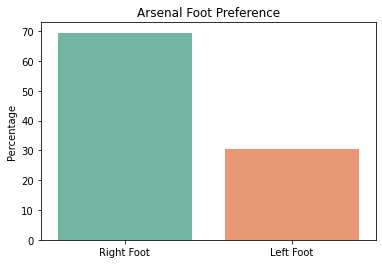

In [19]:
#Barplot for the classes
plt.title("Arsenal Foot Preference")
sns.barplot(x=foot_Arsenal.index,y=foot_Arsenal['Percentage'],palette='Set2')
plt.show()

In [20]:
Arsenal.Age.mean()

22.97222222222222

In [65]:
EPL_Age = EPL.groupby(['Club'],as_index=False)['Age'].mean()
EPL_Age = pd.DataFrame(data=EPL_Age)
EPL_Age

,Club,Age
0,Arsenal,24.538462
1,Aston Villa,25.485714
2,Brentford,23.382353
3,Brighton & Hove Albion,24.000000
4,Burnley,27.054054
5,Chelsea,25.171429
6,Crystal Palace,25.384615
7,Everton,26.270270
8,Leeds United,23.606061
9,Leicester City,25.486486


In [72]:
for age in EPL_Age['Age']:
    if age >= 25:
            print(f'\nThis Team is old', age)
    else:
            print(f'\nThis Team is young', age)


This Team is young 24.53846153846154

This Team is old 25.485714285714284

This Team is young 23.38235294117647

This Team is young 24.0

This Team is old 27.054054054054053

This Team is old 25.17142857142857

This Team is old 25.384615384615383

This Team is old 26.27027027027027

This Team is young 23.606060606060606

This Team is old 25.486486486486488

This Team is old 25.37142857142857

This Team is young 24.90909090909091

This Team is old 26.86842105263158

This Team is old 25.666666666666668

This Team is young 24.11111111111111

This Team is young 24.70967741935484

This Team is young 23.36111111111111

This Team is old 26.097560975609756

This Team is old 26.710526315789473

This Team is young 23.457142857142856


In [74]:
# Top Ten Overall in EPL
EPL_overall = EPL.sort_values(['Overall'], ascending=False)
EPL_overall.head(10)

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
36,Cristiano Ronaldo,36,Portugal,91,Manchester United,45.0,270.0,Right,ST,5.0,2023
3,K. De Bruyne,30,Belgium,91,Manchester City,125.5,350.0,Right,CM,4.0,2025
71,N. Kanté,30,France,90,Chelsea,100.0,230.0,Right,CDM,4.0,2023
39,H. Kane,27,England,90,Tottenham Hotspur,129.5,240.0,Right,ST,4.0,2024
14455,Alisson,28,Brazil,89,Liverpool,82.0,190.0,Right,GK,3.0,2027
241,V. van Dijk,29,Netherlands,89,Liverpool,86.0,230.0,Right,CB,4.0,2025
55,S. Mané,29,Senegal,89,Liverpool,101.0,270.0,Right,LW,4.0,2023
11192,Ederson,27,Brazil,89,Manchester City,94.0,200.0,Left,GK,3.0,2026
129,H. Son,28,Korea Republic,89,Tottenham Hotspur,104.0,220.0,Right,LM,4.0,2025
34,M. Salah,29,Egypt,89,Liverpool,101.0,270.0,Left,RW,4.0,2023


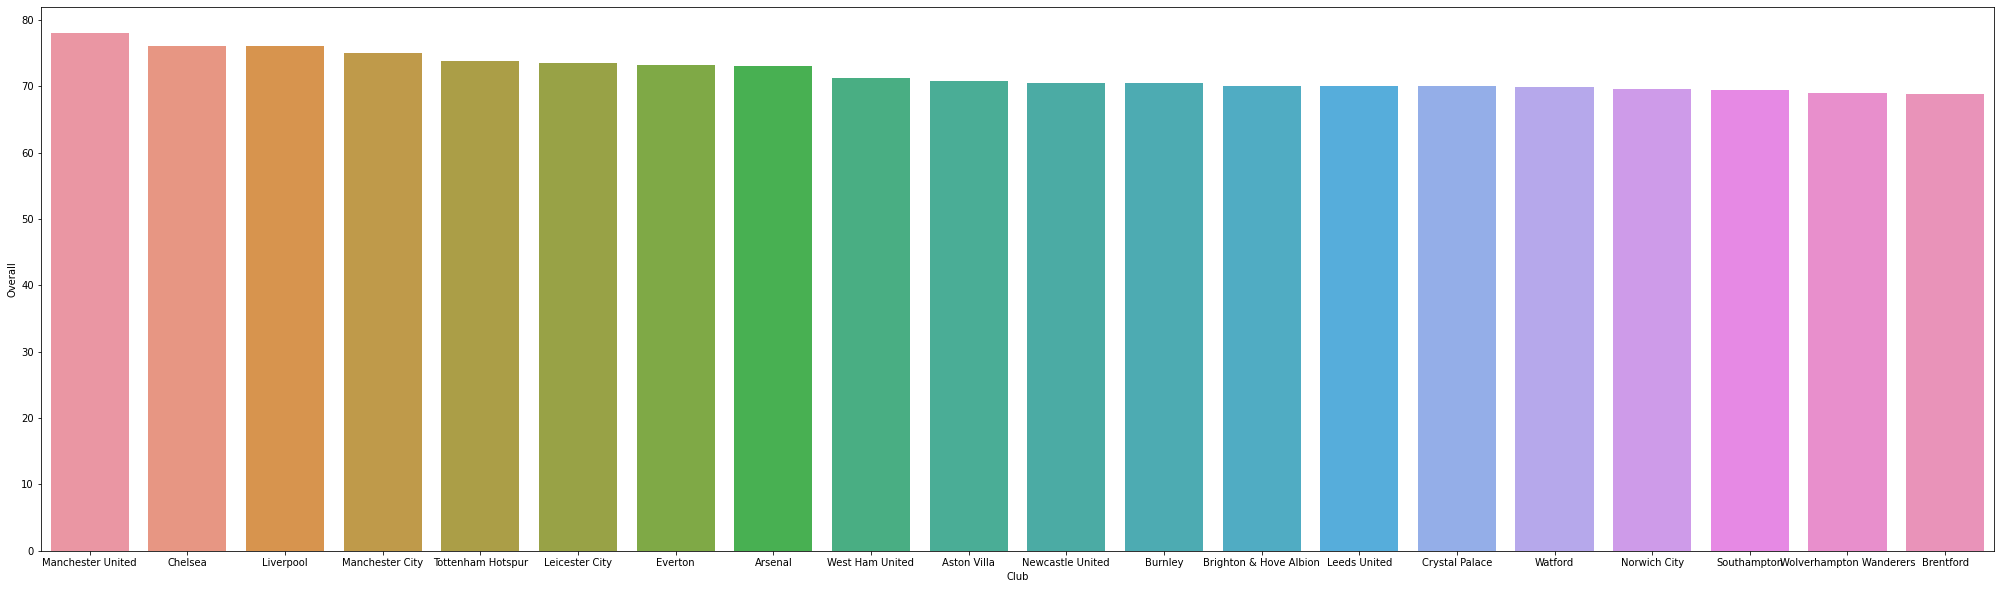

Club
Manchester United          78.048780
Chelsea                    76.166667
Liverpool                  76.142857
Manchester City            75.081081
Tottenham Hotspur          73.888889
Leicester City             73.605263
Everton                    73.184211
Arsenal                    73.121951
West Ham United            71.300000
Aston Villa                70.789474
Newcastle United           70.512195
Burnley                    70.486486
Brighton & Hove Albion     70.027778
Leeds United               70.000000
Crystal Palace             70.000000
Watford                    69.853659
Norwich City               69.638889
Southampton                69.393939
Wolverhampton Wanderers    68.971429
Brentford                  68.911765
Name: Overall, dtype: float64


In [24]:
plt.figure(figsize=(35,10))
club_overall = EPL.groupby('Club')['Overall'].mean().sort_values(ascending =False)
sns.barplot(x=club_overall.index, y=club_overall)
plt.show();
print(club_overall)

Dapat dilihat pada grafik ataupun pada tabel bahwa Manchester United merupakan Club yang memiliki nilai Overall tertinggi di English Premier League sebesar 78.048780 sedangkan Brentford merupakan Club yang memiliki nilai Overall terkecil di English Premier League sebesar 68.911765

In [25]:
EPL['Value'] = EPL['Value'].str.split('€')
EPL['Value'] = EPL['Value'].apply(lambda x:x[1])
#Converting the player value in thousand Euros to Million Euros and then stripping the end denote.
fifa_value_K = EPL.loc[EPL['Value'].str.endswith('K')]
fifa_value_K['Value'] = fifa_value_K['Value'].apply(lambda x: x[:-1])
fifa_value_K['Value'] = fifa_value_K['Value'].astype('float64')
fifa_value_K['Value'] = fifa_value_K['Value']/1000
fifa_value_M = EPL.loc[EPL['Value'].str.endswith('M')]
fifa_value_M['Value'] = fifa_value_M['Value'].apply(lambda x: x[:-1])
fifa_value_M['Value'] = fifa_value_M['Value'].astype('float64')
EPL = pd.concat([fifa_value_M,fifa_value_K])

In [26]:
# Top 10 Values in EPL
EPL_Value = EPL.sort_values(['Value'], ascending=False)
EPL_Value.head(10)

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
39,H. Kane,27,England,90,Tottenham Hotspur,129.5,€240K,Right,ST,4.0,2024
3,K. De Bruyne,30,Belgium,91,Manchester City,125.5,€350K,Right,CM,4.0,2025
855,J. Sancho,21,England,87,Manchester United,116.5,€150K,Right,CAM,3.0,2026
24,T. Alexander-Arnold,22,England,87,Liverpool,114.0,€150K,Right,RB,3.0,2025
220,R. Sterling,26,England,88,Manchester City,107.5,€290K,Right,LW,4.0,2023
0,Bruno Fernandes,26,Portugal,88,Manchester United,107.5,€250K,Right,CAM,3.0,2025
129,H. Son,28,Korea Republic,89,Tottenham Hotspur,104.0,€220K,Right,LM,4.0,2025
2754,Rúben Dias,24,Portugal,87,Manchester City,102.5,€170K,Right,CB,3.0,2027
55,S. Mané,29,Senegal,89,Liverpool,101.0,€270K,Right,LW,4.0,2023
34,M. Salah,29,Egypt,89,Liverpool,101.0,€270K,Left,RW,4.0,2023


Data diatas merupakan data 10 pemain yang memiliki nilai atau 'Value' tertinggi di English Premier League dengan 'Value' terbesar yaitu € 129.5 M yang dimiliki oleh pemain Tottenham Hotspur yaitu Harry Kane

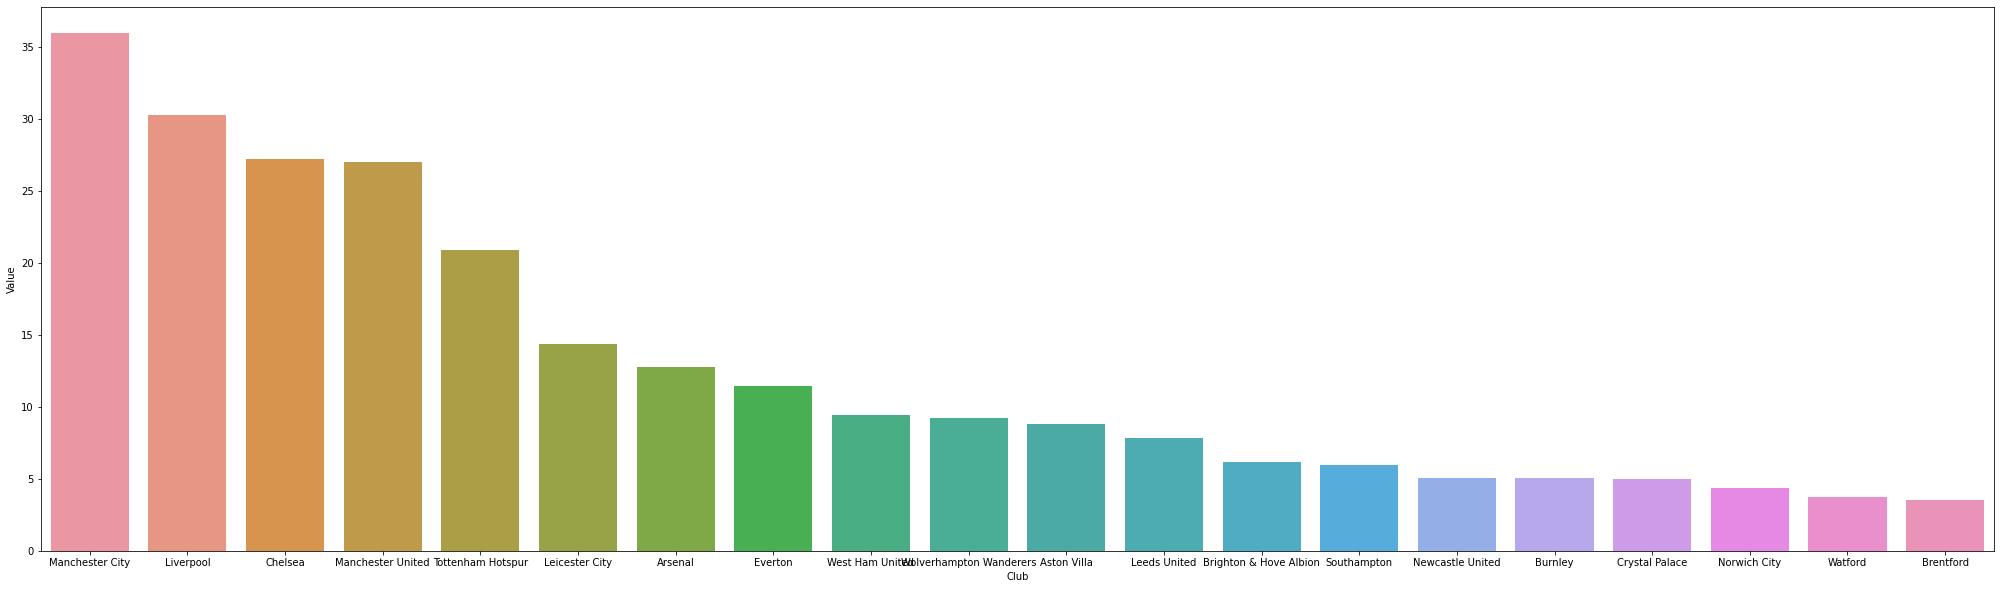

Club
Manchester City            35.966528
Liverpool                  30.305714
Chelsea                    27.217857
Manchester United          27.042921
Tottenham Hotspur          20.891667
Leicester City             14.389737
Arsenal                    12.775610
Everton                    11.452895
West Ham United             9.452000
Wolverhampton Wanderers     9.210143
Aston Villa                 8.837763
Leeds United                7.845000
Brighton & Hove Albion      6.202778
Southampton                 5.972273
Newcastle United            5.084375
Burnley                     5.067838
Crystal Palace              4.970641
Norwich City                4.363611
Watford                     3.754146
Brentford                   3.529118
Name: Value, dtype: float64


In [27]:
plt.figure(figsize=(35,10))
club_value = EPL.groupby('Club')['Value'].mean().sort_values(ascending =False)
sns.barplot(x=club_value.index, y=club_value)
plt.show();
print(club_value)

Data yang berdasarkan rata-rata Value tiap pemain yang dimiliki oleh sebuah Club di EPL dengan Value tertinggi dimiliki oleh Manchester City dengan Value rata-rata pemain sebesar € 35.966528 M

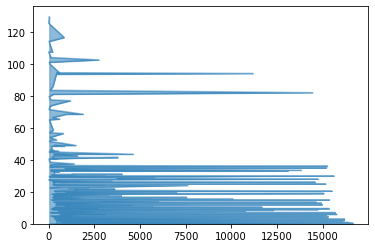

In [28]:
ax = EPL_Value['Value'].plot.area(stacked=False)

<AxesSubplot:>

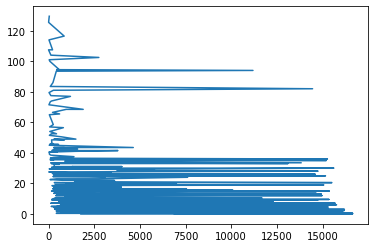

In [29]:
EPL_Value['Value'].plot.line()

In [30]:
EPL['Wage'] = EPL['Wage'].str.split('€')
EPL['Wage'] = EPL['Wage'].apply(lambda x:x[1])
#Converting the player value in thousand Euros to Million Euros and then stripping the end denote.
fifa_Wage_K = EPL.loc[EPL['Wage'].str.endswith('K')]
fifa_Wage_K['Wage'] = fifa_Wage_K['Wage'].apply(lambda x: x[:-1])
fifa_Wage_K['Wage'] = fifa_Wage_K['Wage'].astype('float64')
fifa_Wage_K['Wage'] = fifa_Wage_K['Wage']
fifa_Wage_M = EPL.loc[EPL['Wage'].str.endswith('M')]
fifa_Wage_M['Wage'] = fifa_Wage_M['Wage'].apply(lambda x: x[:-1])
fifa_Wage_M['Wage'] = fifa_Wage_M['Wage'].astype('float64')
EPL = pd.concat([fifa_Wage_M,fifa_Wage_K])

In [31]:
# Top 10 Values in EPL
EPL_Value = EPL.sort_values(['Wage'], ascending=False)
EPL_Value.head(10)

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
3,K. De Bruyne,30,Belgium,91,Manchester City,125.5,350.0,Right,CM,4.0,2025
220,R. Sterling,26,England,88,Manchester City,107.5,290.0,Right,LW,4.0,2023
34,M. Salah,29,Egypt,89,Liverpool,101.0,270.0,Left,RW,4.0,2023
55,S. Mané,29,Senegal,89,Liverpool,101.0,270.0,Right,LW,4.0,2023
36,Cristiano Ronaldo,36,Portugal,91,Manchester United,45.0,270.0,Right,ST,5.0,2023
425,R. Lukaku,28,Belgium,88,Chelsea,93.5,260.0,Left,ST,4.0,2026
0,Bruno Fernandes,26,Portugal,88,Manchester United,107.5,250.0,Right,CAM,3.0,2025
39,H. Kane,27,England,90,Tottenham Hotspur,129.5,240.0,Right,ST,4.0,2024
71,N. Kanté,30,France,90,Chelsea,100.0,230.0,Right,CDM,4.0,2023
241,V. van Dijk,29,Netherlands,89,Liverpool,86.0,230.0,Right,CB,4.0,2025


Kevin De Brunye merupakan pemain dengan gaji tertinggi di EPL saat ini dengan bayaran sebesar € 350 K

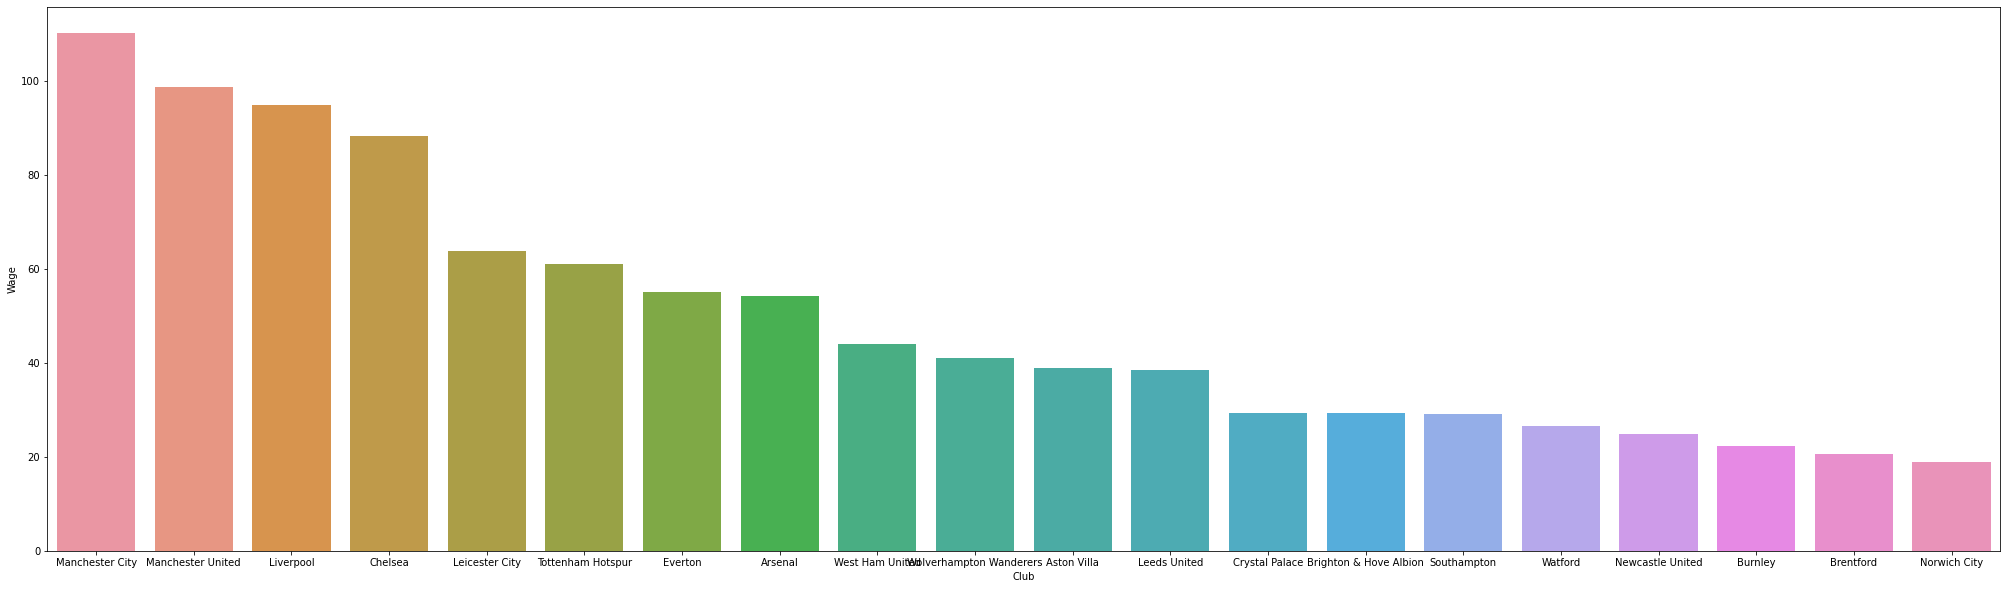

Club
Manchester City            110.272727
Manchester United           98.789474
Liverpool                   95.028571
Chelsea                     88.257143
Leicester City              63.756757
Tottenham Hotspur           61.194444
Everton                     55.081081
Arsenal                     54.282051
West Ham United             44.105263
Wolverhampton Wanderers     41.114286
Aston Villa                 38.885714
Leeds United                38.454545
Crystal Palace              29.410256
Brighton & Hove Albion      29.361111
Southampton                 29.161290
Watford                     26.536585
Newcastle United            24.794872
Burnley                     22.378378
Brentford                   20.617647
Norwich City                18.833333
Name: Wage, dtype: float64


In [32]:
plt.figure(figsize=(35,10))
club_wage = EPL.groupby('Club')['Wage'].mean().sort_values(ascending =False)
sns.barplot(x=club_wage.index, y=club_wage)
plt.show();
print(club_wage)

In [ ]:
Data dimana Manchester City adalah Club yang paling besar dalam pengeluaran gaji dalam 1 Pekan sebesar € 110.272727 K

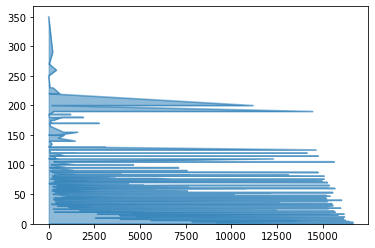

In [33]:
ax = EPL_Value['Wage'].plot.area(stacked=False)

<AxesSubplot:>

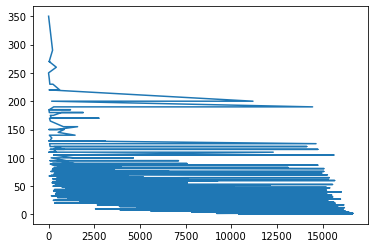

In [34]:
EPL_Value['Wage'].plot.line()

In [35]:
EPL_Wage_means = EPL.groupby(['Club'],as_index=False)['Wage'].mean()
EPL_Wage_means = pd.DataFrame(data=EPL_Wage_means)
EPL_Wage_means.sort_values(by='Wage', ascending=False)

,Club,Wage
11,Manchester City,110.272727
12,Manchester United,98.789474
10,Liverpool,95.028571
5,Chelsea,88.257143
9,Leicester City,63.756757
16,Tottenham Hotspur,61.194444
7,Everton,55.081081
0,Arsenal,54.282051
18,West Ham United,44.105263
19,Wolverhampton Wanderers,41.114286


In [36]:
EPL_Value_means = EPL.groupby(['Club'],as_index=False)['Value'].mean()
EPL_Value_means = pd.DataFrame(data=EPL_Value_means)
EPL_Value_means.sort_values(by='Value', ascending=False)

,Club,Value
11,Manchester City,39.152879
10,Liverpool,30.305714
5,Chelsea,27.217857
12,Manchester United,27.042921
16,Tottenham Hotspur,20.891667
9,Leicester City,14.769865
0,Arsenal,13.406410
7,Everton,11.753649
18,West Ham United,9.922500
1,Aston Villa,9.559571


In [37]:
# English Players
EPL_England = EPL.loc[EPL['Nationality']=='England']
EPL_England.sort_values(['Overall','Wage'],ascending=False)[:10]

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
39,H. Kane,27,England,90,Tottenham Hotspur,129.5,240.0,Right,ST,4.0,2024
220,R. Sterling,26,England,88,Manchester City,107.5,290.0,Right,LW,4.0,2023
24,T. Alexander-Arnold,22,England,87,Liverpool,114.0,150.0,Right,RB,3.0,2025
855,J. Sancho,21,England,87,Manchester United,116.5,150.0,Right,CAM,3.0,2026
154,J. Vardy,34,England,86,Leicester City,33.0,180.0,Right,ST,3.0,2023
53,K. Walker,31,England,85,Manchester City,39.0,170.0,Right,RB,3.0,2024
127,M. Rashford,23,England,85,Manchester United,77.5,150.0,Right,CAM,3.0,2023
713,J. Grealish,25,England,84,Manchester City,50.5,180.0,Right,CAM,3.0,2027
1591,H. Maguire,28,England,84,Manchester United,42.5,155.0,Right,CB,3.0,2024
46,J. Henderson,31,England,84,Liverpool,29.5,140.0,Right,CDM,3.0,2025


In [38]:
# Germany Players
EPL_England = EPL.loc[EPL['Nationality']=='Germany']
EPL_England.sort_values(['Overall','Wage'],ascending=False)[:10]

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
47,I. Gündoğan,30,Germany,85,Manchester City,51.5,185.0,Right,CM,3.0,2023
812,T. Werner,25,Germany,84,Chelsea,56.5,155.0,Right,ST,3.0,2025
588,K. Havertz,22,Germany,84,Chelsea,94.5,130.0,Left,CAM,3.0,2025
2451,A. Rüdiger,28,Germany,83,Chelsea,34.5,130.0,Right,CB,2.0,2022
14753,B. Leno,29,Germany,83,Arsenal,28.0,87.0,Right,GK,3.0,2023
12300,18 P. Mertesacker,32,Germany,80,Arsenal,8.5,110.0,Right,CB,3.0,2018
7009,R. Koch,24,Germany,77,Leeds United,19.5,56.0,Right,CB,2.0,2024
684,P. Groß,30,Germany,76,Brighton & Hove Albion,7.0,51.0,Right,CM,2.0,2022
15295,L. Karius,28,Germany,75,Liverpool,4.5,61.0,Right,GK,2.0,2022
1725,L. Rupp,30,Germany,73,Norwich City,2.9,28.0,Right,CM,1.0,2022


In [39]:
# France Players
EPL_England = EPL.loc[EPL['Nationality']=='France']
EPL_England.sort_values(['Overall','Wage'],ascending=False)[:10]

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
71,N. Kanté,30,France,90,Chelsea,100.0,230.0,Right,CDM,4.0,2023
27,P. Pogba,28,France,87,Manchester United,79.5,220.0,Right,CM,4.0,2022
14644,H. Lloris,34,France,87,Tottenham Hotspur,13.5,125.0,Left,GK,4.0,2022
1897,R. Varane,28,France,86,Manchester United,68.5,180.0,Right,CB,3.0,2025
22,L. Digne,27,France,84,Everton,40.5,110.0,Left,LB,2.0,2023
533,A. Lacazette,30,France,82,Arsenal,30.0,110.0,Right,ST,3.0,2022
197,T. Ndombele,24,France,82,Tottenham Hotspur,46.0,95.0,Right,CAM,1.0,2024
14601,A. Areola,28,France,82,West Ham United,26.0,75.0,Right,GK,2.0,"Jun 30, 2022"
895,A. Martial,25,France,81,Manchester United,34.5,130.0,Right,CAM,3.0,2024
2357,K. Zouma,26,France,81,West Ham United,30.0,75.0,Right,CB,2.0,2025


In [40]:
# Brazil Players
EPL_England = EPL.loc[EPL['Nationality']=='Brazil']
EPL_England.sort_values(['Overall','Wage'],ascending=False)[:10]

,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,Best Position,International Reputation,Contract Valid Until
11192,Ederson,27,Brazil,89,Manchester City,94.0,200.0,Left,GK,3.0,2026
14455,Alisson,28,Brazil,89,Liverpool,82.0,190.0,Right,GK,3.0,2027
96,Fabinho,27,Brazil,86,Liverpool,73.5,165.0,Right,CDM,3.0,2026
68,Roberto Firmino,29,Brazil,85,Liverpool,54.0,185.0,Right,CF,3.0,2023
716,Thiago Silva,36,Brazil,85,Chelsea,9.5,105.0,Right,CB,4.0,2022
436,Gabriel Jesus,24,Brazil,83,Manchester City,52.5,150.0,Right,ST,2.0,2023
142,Fernandinho,36,Brazil,83,Manchester City,7.0,100.0,Right,CDM,3.0,2022
166,Allan,30,Brazil,83,Everton,30.5,100.0,Right,CDM,2.0,2023
16,Alex Telles,28,Brazil,82,Manchester United,27.5,130.0,Left,LB,3.0,2024
182,Richarlison,24,Brazil,82,Everton,46.5,100.0,Right,ST,3.0,2024


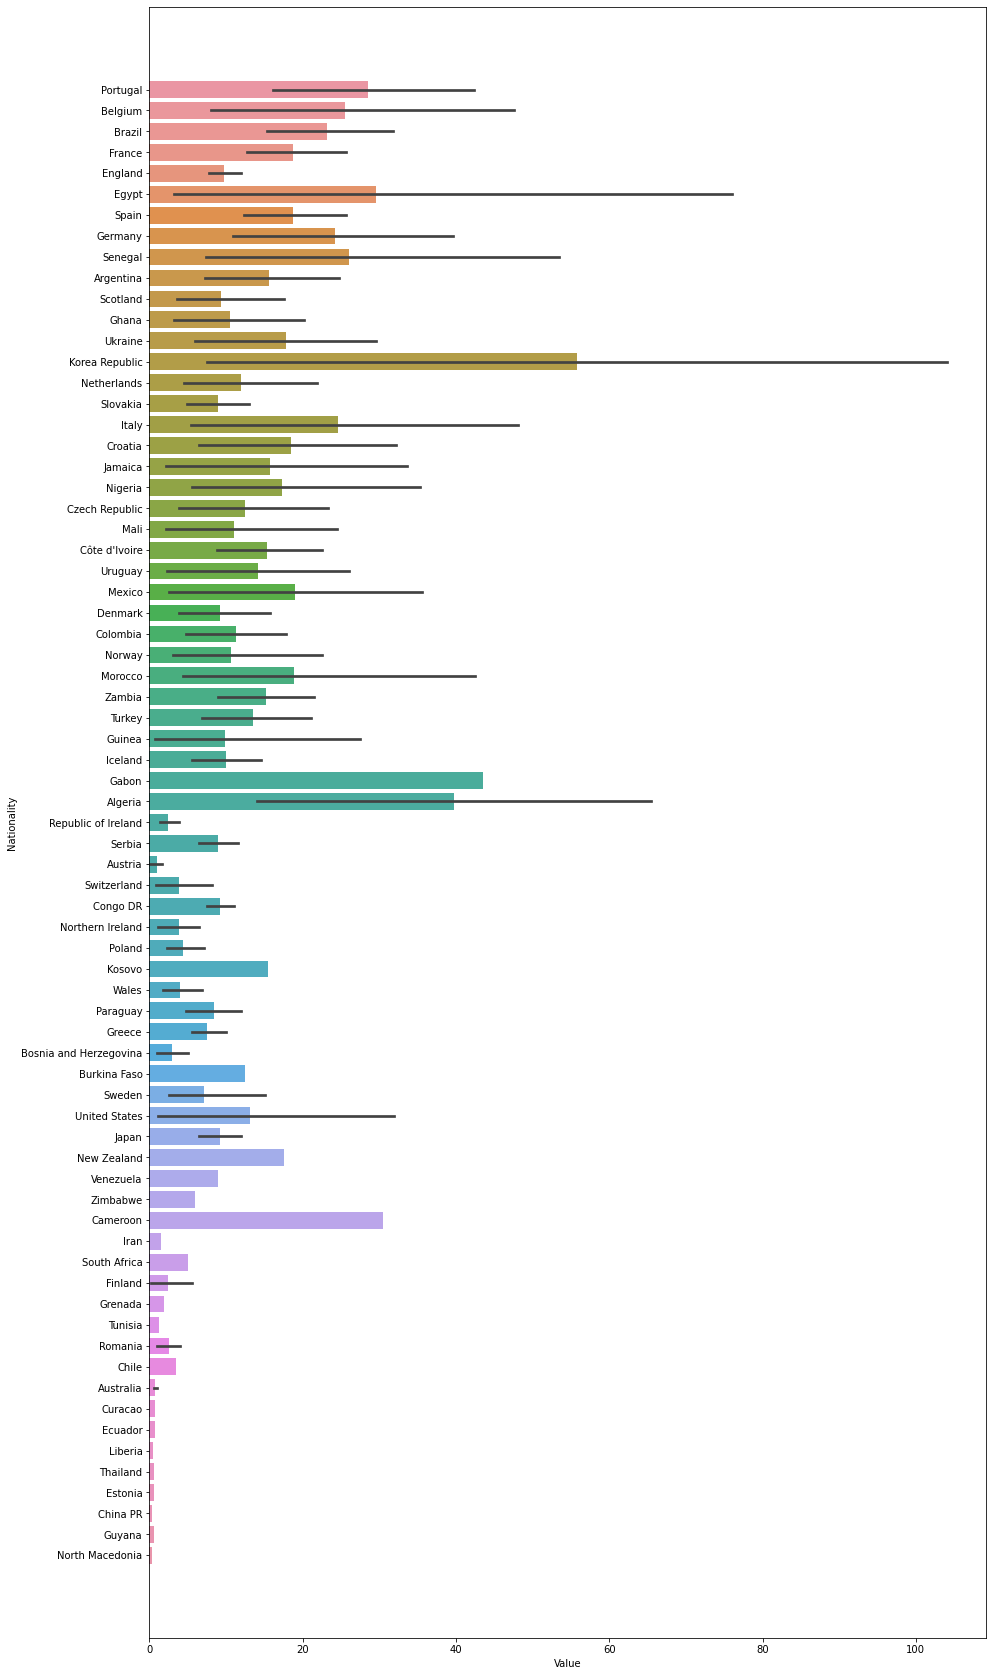

In [41]:
plt.figure(figsize=(15,30))
sns.barplot(y=EPL['Nationality'], x = EPL['Value'])
plt.plot();

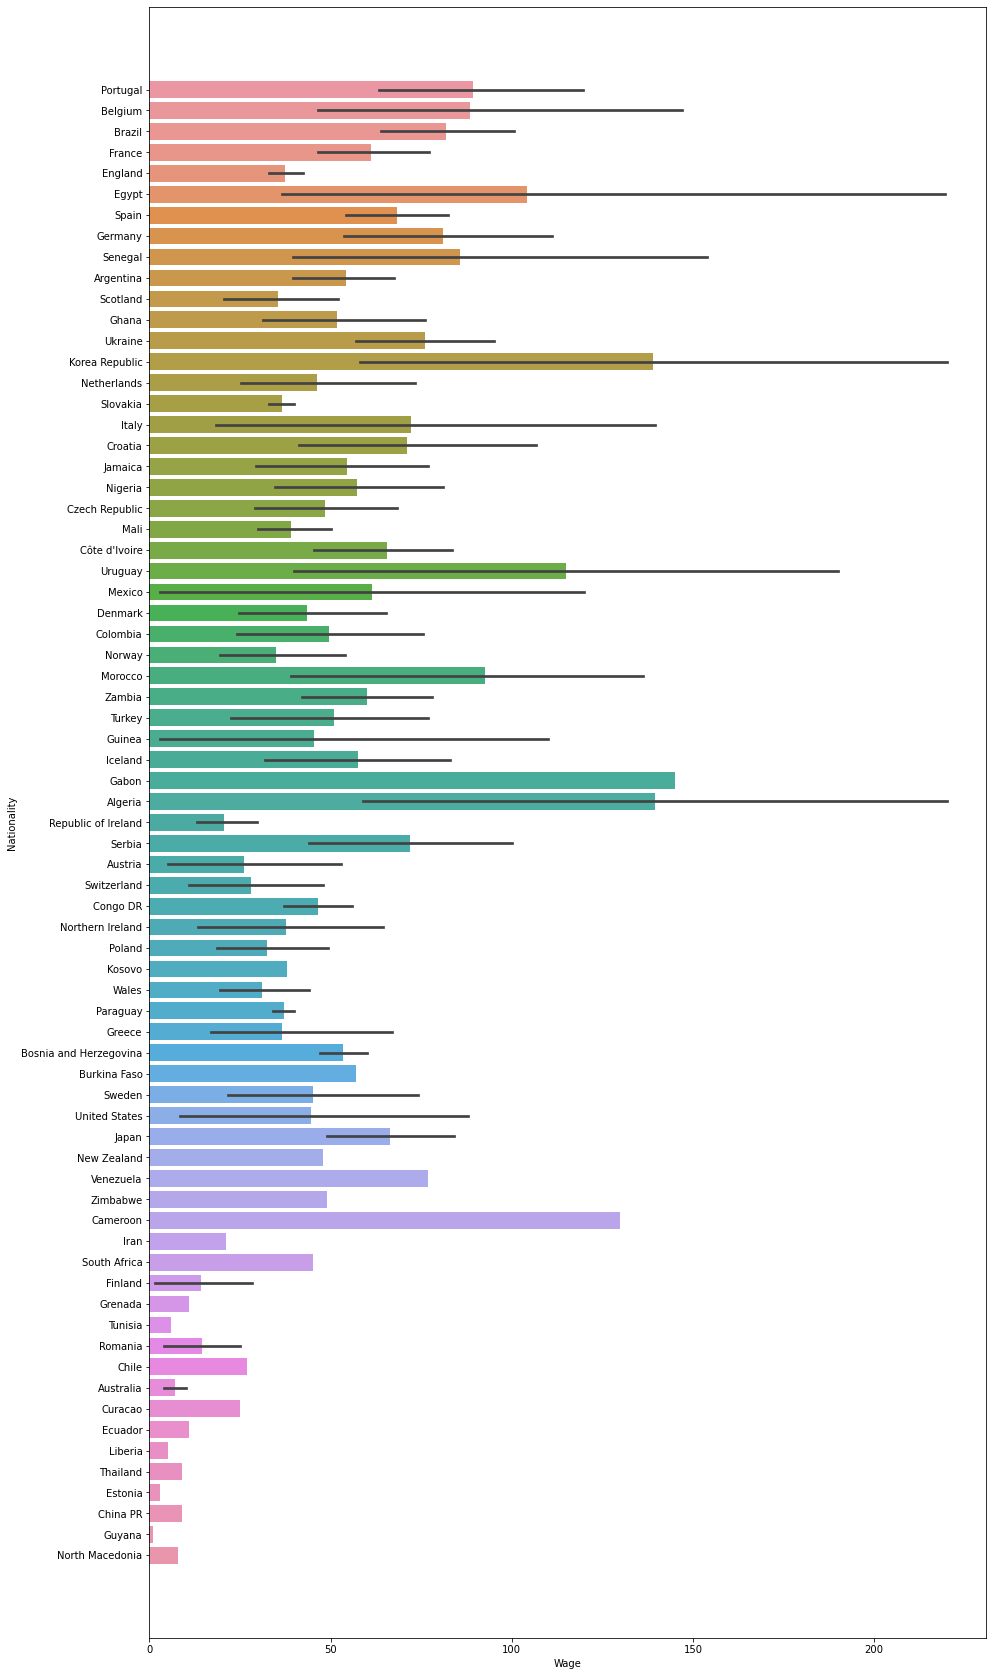

In [42]:
plt.figure(figsize=(15,30))
sns.barplot(y=EPL['Nationality'], x = EPL['Wage'])
plt.plot();

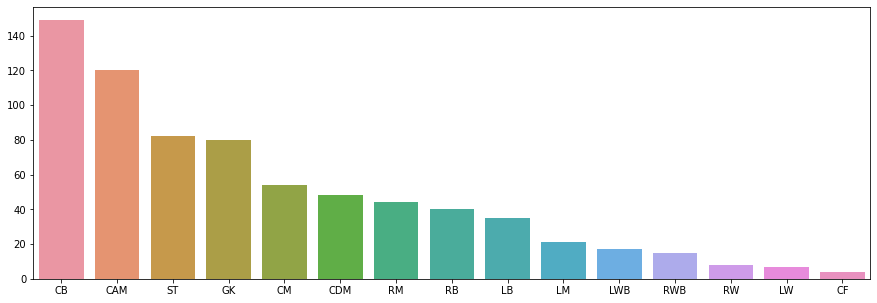

In [43]:
EPL_pos = EPL['Best Position'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(EPL_pos.index,EPL_pos.values)
plt.show()

[]

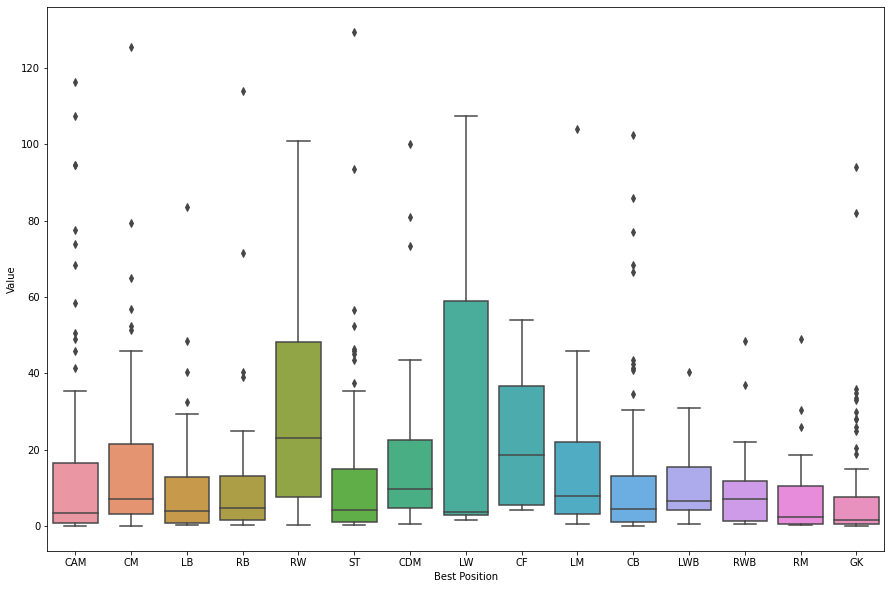

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(y=EPL['Value'],x=EPL['Best Position'])
plt.plot()

[]

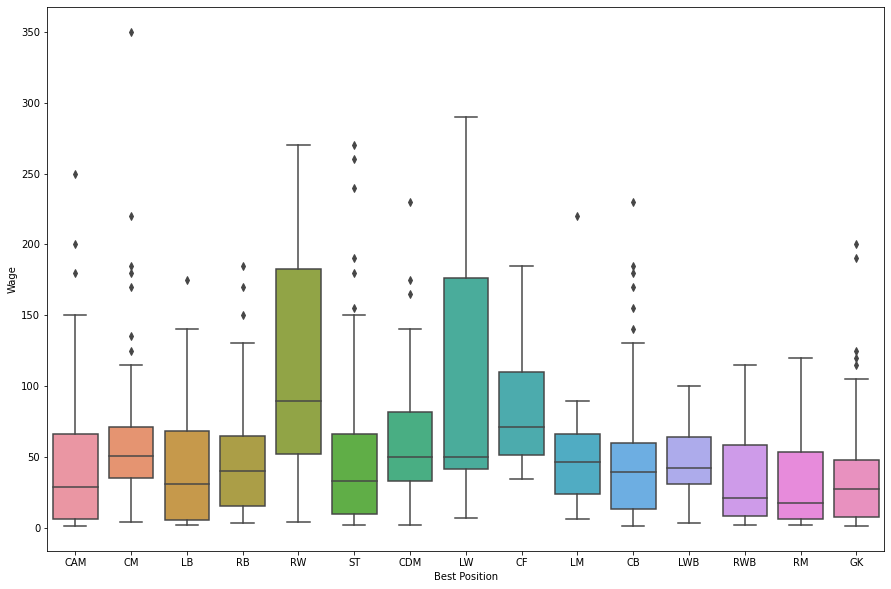

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(y=EPL['Wage'],x=EPL['Best Position'])
plt.plot()

In [59]:
data = EPL[['Name','Age','Nationality','Overall','Club','Value','Wage','Preferred Foot','Best Position', 'International Reputation','Contract Valid Until']].copy()

f